In [6]:
import gffpandas.gffpandas as gffpd

import pandas as pd
import seaborn as sns
from pandas.core.common import SettingWithCopyWarning
import gseapy as gp
import warnings

import numpy as np
from gseapy.plot import barplot, dotplot
from matplotlib import pyplot as plt 


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
path_to_data='../'

In [2]:
annotation = gffpd.read_gff3('{}/{}'.format(path_to_data, 'GCF_003957565.2_bTaeGut1.4.pri_genomic.gff'))

df_ori = annotation.df
df_ori['chrom']=df_ori['seq_id']
df = df_ori[df_ori['type']=='gene']

df['element_ID'] = df['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
background = df['element_ID'].tolist()
len(background)

21732

In [3]:
go_BP = gp.get_library(name='GO_Biological_Process_2021', organism='Human')
go_MF = gp.get_library(name='GO_Molecular_Function_2021', organism='Human')
go_CC = gp.get_library(name='GO_Cellular_Component_2021', organism='Human')
go_reactome = gp.get_library(name='Reactome_2016', organism='Human')

In [4]:
def get_df(database, genelist, background):
    enr = gp.enrichr(gene_list=genelist ,
        gene_sets=database,
        background = background,  
        outdir=None,
        cutoff=0.5,                          
     )
    return enr


neural_list = ['synap', 'axon', 'neuron', 'dendrit','brain', 'neural', 'nerve', 'nervous', 'neurotransmitter'] #'', 'neural',dendritic

def check_neural(x):
    for i in neural_list:
        if i in x:
            return True
    else:
        return False

In [5]:
i=2
file = open('../dir_gene_list/gene_list_{}.txt'.format(i)).read()
genelist = file.split('\n')

df_proc = get_df(go_BP, genelist, background).res2d
df_proc = df_proc[df_proc['Adjusted P-value']<0.05]

In [ ]:
### Анализ

pd.read_

In [29]:
new_df[new_df['Adjusted P-value_y'].isna()]

,Term,Adjusted P-value_x,Gene_set,Overlap,P-value,Adjusted P-value_y,Odds Ratio,Genes


In [73]:
def check_bigger(p_x, p_y):
    if p_y or p_x<p_y:
        return 0
    else:
        return 1

i=1
file = open('../dir_gene_list/gene_list_{}.txt'.format(i)).read()
genelist = file.split('\n')

df_proc = get_df(go_BP, genelist, background).res2d
df_proc = df_proc[df_proc['Adjusted P-value']<0.05]
df_to_check = df_proc[['Term', 'Adjusted P-value']].reset_index()
df_to_check['is_smaller'] = 1

for i in range(2, 71)[:2]:
    file = open('../dir_gene_list/gene_list_{}.txt'.format(i)).read()
    genelist = file.split('\n')

    df_proc = get_df(go_BP, genelist, background).res2d
    df_proc = df_proc[df_proc['Adjusted P-value']<0.05]

    new_df = df_to_check.merge(df_proc, on = 'Term', how='left')

    new_df['is_smaller'] = new_df.apply(lambda x: check_bigger(x['Adjusted P-value_x'], x['Adjusted P-value_y']), axis=1)
    df_to_check['is_smaller']+=new_df['is_smaller']
    df_to_check['is_smaller']

    
df_to_check.to_csv('../permutations_n_terms.csv', index = False)


In [12]:
df = pd.read_csv('../permutations_n_terms_go_reactome.csv')
df

,Term,Adjusted P-value,is_smaller,n
0,ARMS-mediated activation Homo sapiens R-HSA-17...,0.000213,1,70
1,Activation of NMDA receptor upon glutamate bin...,0.003439,1,70
2,Activation of TRKA receptors Homo sapiens R-HS...,0.026887,1,70
3,Adaptive Immune System Homo sapiens R-HSA-1280218,0.000105,1,70
4,Adherens junctions interactions Homo sapiens R...,0.000046,1,70
...,...,...,...,...
200,Voltage gated Potassium channels Homo sapiens ...,0.007413,1,70
201,WNT mediated activation of DVL Homo sapiens R-...,0.026887,1,70
202,YAP1- and WWTR1 (TAZ)-stimulated gene expressi...,0.007904,1,70
203,eNOS activation Homo sapiens R-HSA-203615,0.047128,1,70


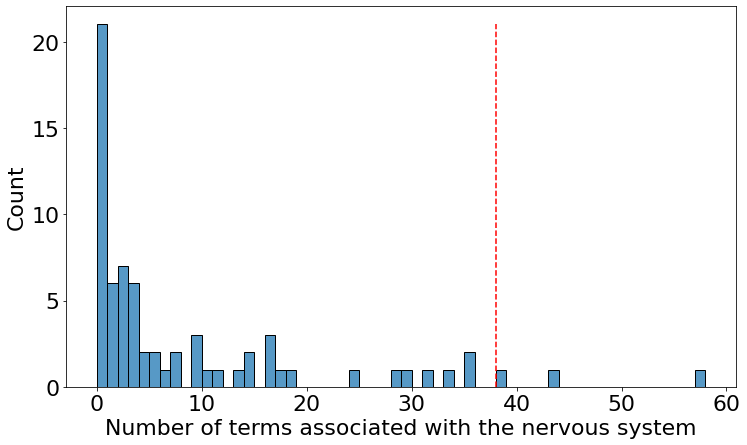

In [30]:
df = pd.read_csv('../permutations_n_terms.csv')
df[df['n_terms']>=38].shape[0]/70


df['Number of terms associated with the nervous system'] = df['n_terms']
plt.figure(figsize = (12,7))
plt.rcParams.update({'font.size': 22})
sns.histplot(data = df, x = 'Number of terms associated with the nervous system', binwidth=1)
plt.plot([38,38], [0,df['n_terms'].value_counts().max()], 'r', linestyle='dashed')

In [21]:
fi = open('terms.txt', 'w')
fi.write('\n'.join(list(df_proc['Term'])))
fi.close()

In [19]:
list(df_proc['Term'])

['B cell receptor signaling pathway (GO:0050853)',
 'DNA-templated transcription, initiation (GO:0006352)',
 'Golgi localization (GO:0051645)',
 'Golgi organization (GO:0007030)',
 'MAPK cascade (GO:0000165)',
 'O-glycan processing (GO:0016266)',
 'RNA processing (GO:0006396)',
 'Ras protein signal transduction (GO:0007265)',
 'Rho protein signal transduction (GO:0007266)',
 'TOR signaling (GO:0031929)',
 'Wnt signaling pathway (GO:0016055)',
 'actin cytoskeleton reorganization (GO:0031532)',
 'actin filament network formation (GO:0051639)',
 'actin filament organization (GO:0007015)',
 'actin filament-based transport (GO:0099515)',
 'actin polymerization or depolymerization (GO:0008154)',
 'activation of GTPase activity (GO:0090630)',
 'activation of protein kinase activity (GO:0032147)',
 'adenylate cyclase-activating G protein-coupled receptor signaling pathway (GO:0007189)',
 'adenylate cyclase-modulating G protein-coupled receptor signaling pathway (GO:0007188)',
 'adherens juncti

In [53]:
# i = str(2)

# for i in range(1, 71)[1:2]:
#     i = str(i)
#     df2 = pd.read_csv('{}/{}'.format(path_to_data, 'permutation_test/'+i+'.csv'))
#     df2 = df2[df2['start']!='start'].to_csv('{}/{}'.format(path_to_data, 'permutation_test/'+i+'.csv'))

#     df2 = pd.read_csv('{}/{}'.format(path_to_data, 'permutation_test/'+i+'.csv'))

#     df2['start'] = df2['start']+1 
#     df3 = df2

#     matched_list = []

#     for chrom in df3['chrom'].unique():
#         df3_chrom = df3[df3['chrom']== chrom]
#         df_chrom = df[df['chrom']==chrom]

#         for idx in df3_chrom.index:
#             df_small = df_chrom[(df_chrom['start']<=df3_chrom.loc[idx]['start'])
#                                         &(df_chrom['end']>=df3_chrom.loc[idx]['start'])]
#             df_small['coord'] = int(df3_chrom.loc[idx]['start'])
#             df_small['coord'] = int(df3_chrom.loc[idx]['start'])
#             df_small['coord'] = df_small['coord'] - 1
#             matched_list.append(df_small)

#     df_genes = pd.concat(matched_list)

#     df_genes['element_ID'] = df_genes['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])

#     genelist = list(set(df_genes['element_ID'].to_list()))

#     file = open('../dir_gene_list/gene_list_{}.txt'.format(i), 'w')
#     file.write('\n'.join(genelist))
#     file.close()



In [55]:
genelist = open('../dir_gene_list/gene_list_{}.txt'.format(i), 'r').read().split('\n')

df_proc = get_df(go_BP, genelist, background).res2d
df_proc = df_proc[df_proc['Adjusted P-value']<0.05]


df_proc[df_proc['Term'].apply(lambda x: check_neural(x))].shape[0]

0

In [59]:
df_proc = get_df(go_BP, genelist, background).res2d

In [67]:
def get_df(database, genelist, background):
    enr = gp.enrichr(gene_list=genelist ,
        gene_sets=database,
        background = background,  
        outdir=None,
        cutoff=0.5,                          
     )
    return enr


neural_list = ['synap', 'axon', 'neuron', 'dendrite','brain', 'neural'] #'', 'neural',
def check_neural(x):
    for i in neural_list:
        if i in x:
            return True
    else:
        return False

df_proc[df_proc['Term'].apply(lambda x: check_neural(x))]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes
241,gs_ind_0,Wnt signaling pathway involved in midbrain dop...,3/10,0.432485,0.840492,1.411620,WNT2;RYK;LRP6
362,gs_ind_0,anterograde axonal protein transport (GO:0099641),2/7,0.519945,0.886099,1.411539,KIF5C;DLG2
363,gs_ind_0,anterograde axonal transport (GO:0008089),8/35,0.606961,0.898933,1.013800,KIF5C;RAB21;BLOC1S2;SOD1;DLG2;AP3M1;TRAK2;KIF1A
366,gs_ind_0,anterograde synaptic vesicle transport (GO:004...,2/15,0.900948,0.949095,0.682749,AP3M1;BLOC1S2
367,gs_ind_0,anterograde trans-synaptic signaling (GO:0098916),51/185,0.119153,0.715107,1.177276,HTR7;GABRG3;SYT1;HTR1F;SLC1A2;CHRM4;GABRB3;LPA...
...,...,...,...,...,...,...,...
5356,gs_ind_0,synaptic vesicle recycling (GO:0036465),7/31,0.622684,0.898933,1.008109,SYT1;NLGN4X;STON2;SNCG;SYT8;SYNJ1;SYT7
5357,gs_ind_0,synaptic vesicle transport (GO:0048489),2/10,0.723382,0.898933,1.008101,KIF5C;SYNJ1
5358,gs_ind_0,synaptic vesicle transport along microtubule (...,2/15,0.900948,0.949095,0.682749,AP3M1;BLOC1S2
5439,gs_ind_0,transport across blood-brain barrier (GO:0150104),21/65,0.069437,0.656812,1.391446,SLC4A3;SLC38A2;SLC38A1;SLC1A2;SLC7A1;SLC15A2;C...


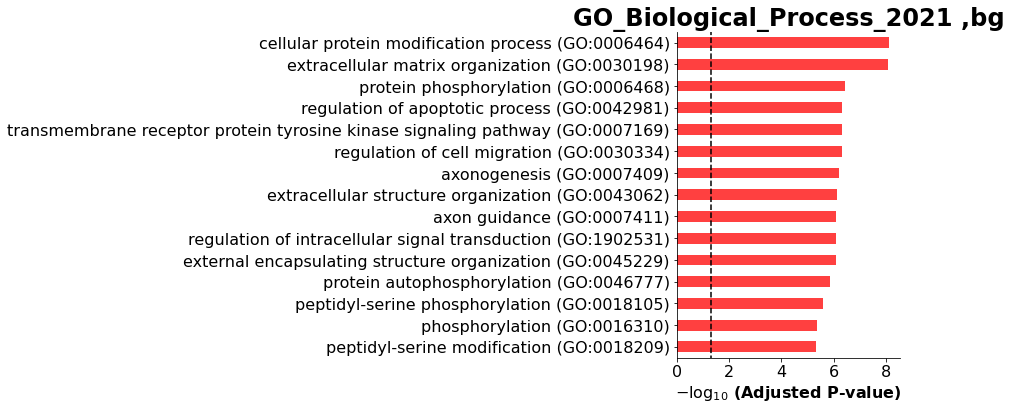

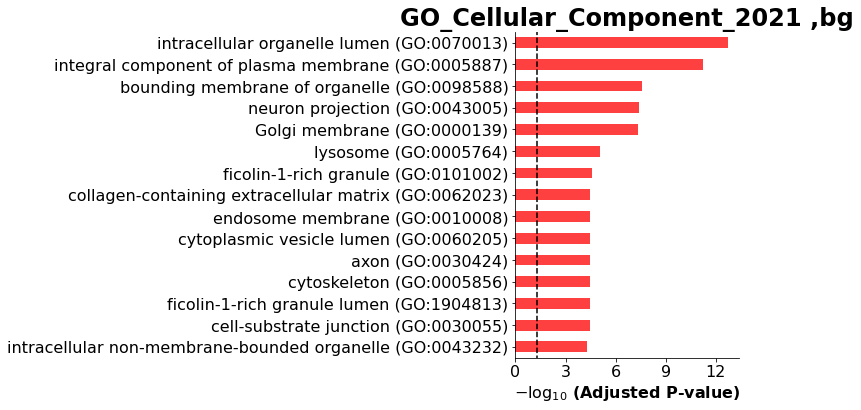

In [12]:
l = -np.log10(0.05)


    
def plot(df, bg, name):
    barplot(df.res2d,title= name +' ,' +bg, top_term=15, cutoff=0.05,color = 'r')
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k', label = '- log10(0.05)')

plot(get_df(go_BP, genelist, background), 'bg', 'GO_Biological_Process_2021')
#plot(get_df(go_MF, genelist, background), 'bg', 'GO_Molecular_Function_2021')
plot(get_df(go_CC, genelist, background), 'bg', 'GO_Cellular_Component_2021')
#plot(get_df(go_reactome, genelist, background), 'bg', 'Reactome_2016')

20